In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data 
# ALL: correlation of all segments (acceleration or decceleration capacity) with the corresponding segments of the vg metric
# AC: correlating only acceleration capacity
# DC: correlating only decceleration capacity

path = "/home/jemrich/vg_graph_metrics/correlation.csv"
df = pd.read_csv(path)
# remove nan
df = df.dropna(axis=0, how='any')
df

,record,metric,ALL,AC,DC,beats_per_window,edge_weight,direction,freq_domain
10,0A9Y9KRUR2_-,minimum_cut_value_left_to_right,0.399150,0.340146,0.439070,4,slope,left_to_right,False
11,0A9Y9KRUR2_-,maximum_flow_value_left_to_right,0.399150,0.340146,0.439070,4,slope,left_to_right,False
12,0A9Y9KRUR2_-,shortest_path_length_left_to_right,0.980595,0.981047,0.986968,4,slope,left_to_right,False
13,0A9Y9KRUR2_-,dag_longest_path_length,0.321053,0.330197,0.355224,4,slope,left_to_right,False
26,0A9Y9KRUR2_-,minimum_cut_value_left_to_right,0.431853,0.356894,0.493442,4,angle,left_to_right,False
...,...,...,...,...,...,...,...,...,...
3915,32FNOJYV9K_-,dag_longest_path_length,0.455135,0.415843,0.504524,4,v_distance,left_to_right,False
3916,3333VKINUN_Myo,minimum_cut_value_left_to_right,0.507206,0.309780,0.624870,4,v_distance,left_to_right,False
3917,3333VKINUN_Myo,maximum_flow_value_left_to_right,0.507206,0.309780,0.624870,4,v_distance,left_to_right,False
3918,3333VKINUN_Myo,shortest_path_length_left_to_right,0.968040,0.976797,0.977493,4,v_distance,left_to_right,False


In [3]:
# create column with largest correlation
df['max'] = df[['ALL', 'AC', 'DC']].abs().max(axis=1)
# sort by correlation
df.sort_values(by=["ALL", "AC", "DC", "metric"], ascending=False).head(10)

,record,metric,ALL,AC,DC,beats_per_window,edge_weight,direction,freq_domain,max
255,0FBIQ4IN69_Myo,shortest_path_length_left_to_right,1.000000,0.995010,1.000000,4,v_distance,left_to_right,False,1.000000
169,0FBIQ4IN69_Myo,dag_longest_path_length,0.999993,0.099627,1.000000,4,slope,left_to_right,False,1.000000
256,0FBIQ4IN69_Myo,dag_longest_path_length,0.999993,0.099627,1.000000,4,v_distance,left_to_right,False,1.000000
166,0FBIQ4IN69_Myo,minimum_cut_value_left_to_right,0.999993,0.111495,1.000000,4,slope,left_to_right,False,1.000000
167,0FBIQ4IN69_Myo,maximum_flow_value_left_to_right,0.999993,0.111495,1.000000,4,slope,left_to_right,False,1.000000
253,0FBIQ4IN69_Myo,minimum_cut_value_left_to_right,0.999993,0.105222,1.000000,4,v_distance,left_to_right,False,1.000000
254,0FBIQ4IN69_Myo,maximum_flow_value_left_to_right,0.999993,0.105222,1.000000,4,v_distance,left_to_right,False,1.000000
168,0FBIQ4IN69_Myo,shortest_path_length_left_to_right,0.999975,0.993369,0.999999,4,slope,left_to_right,False,0.999999
1193,0ZMQ1WUSOI_-,shortest_path_length_left_to_right,0.999908,0.999970,0.964213,4,v_distance,left_to_right,False,0.999970
3578,2XN54NAO2M_Myo,shortest_path_length_left_to_right,0.999905,0.999949,0.999952,4,v_distance,left_to_right,False,0.999952


In [4]:
df0 = df.set_index(['metric', 'beats_per_window', 'edge_weight', 'direction', 'freq_domain', 'record'])
df0 = df0.stack()
df0 = df0.reset_index()
df0 = df0.rename(columns={'level_6': 'type', 0: 'value'}) 
df0 = df0.set_index(['metric', 'beats_per_window', 'edge_weight', 'direction', 'freq_domain'])
df0.index = df0.index.map(str)
#df0.index = df0.index.map('_'.join)
#df0 = df0.dropna(axis=0, how='any')
df0 = df0[df0['type'].isin(['AC', 'DC'])]
df0 = df0.sort_values(by=['value'], ascending=False)
df0

,record,type,value
"('shortest_path_length_left_to_right', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('dag_longest_path_length', 4, 'slope', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('dag_longest_path_length', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('minimum_cut_value_left_to_right', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('maximum_flow_value_left_to_right', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
...,...,...,...
"('maximum_flow_value_left_to_right', 4, 'angle', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,0.017837
"('dag_longest_path_length', 4, 'angle', 'left_to_right', False)",0ZMQ1WUSOI_-,AC,0.011665
"('shortest_path_length_left_to_right', 4, 'angle', 'left_to_right', False)",0ZMQ1WUSOI_-,AC,0.007263
"('dag_longest_path_length', 4, 'angle', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,0.006410


In [11]:
df0.groupby(by=[df0.index, 'type'])['value'].agg(['median', 'mean', 'std']).sort_values(by=['median'], ascending=False)

median      mean  \
                                                   type                       
('shortest_path_length_left_to_right', 4, 'v_di... DC    0.985118  0.981549   
                                                   AC    0.984282  0.980556   
('shortest_path_length_left_to_right', 4, 'slop... AC    0.951057  0.950084   
                                                   DC    0.904407  0.905709   
('dag_longest_path_length', 4, 'slope', 'left_t... DC    0.701684  0.659175   
('dag_longest_path_length', 4, 'v_distance', 'l... DC    0.701684  0.659175   
('shortest_path_length_left_to_right', 4, 'angl... AC    0.583753  0.556958   
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.572813  0.552571   
('maximum_flow_value_left_to_right', 4, 'slope'... DC    0.572813  0.552571   
('maximum_flow_value_left_to_right', 4, 'v_dist... DC    0.539753  0.522111   
('minimum_cut_value_left_to_right', 4, 'v_dista... DC    0.539753  0.522111   
('dag_longest_path_length', 4, 'angle', 'left_t... DC    0.531647  0.518005   
('shortest_path_length_left_to_right', 4, 'angl... DC    0.523650  0.512154   
('dag_longest_path_length', 4, 'v_distance', 'l... AC    0.475706  0.490010   
('dag_longest_path_length', 4, 'slope', 'left_t... AC    0.475706  0.490010   
('minimum_cut_value_left_to_right', 4, 'angle',... DC    0.444166  0.429298   
('maximum_flow_value_left_to_right', 4, 'angle'... DC    0.444166  0.429298   
('minimum_cut_value_left_to_right', 4, 'slope',... AC    0.426421  0.452421   
('maximum_flow_value_left_to_right', 4, 'slope'... AC    0.426421  0.452421   
('minimum_cut_value_left_to_right', 4, 'v_dista... AC    0.412208  0.442229   
('maximum_flow_value_left_to_right', 4, 'v_dist... AC    0.412208  0.442229   
('dag_longest_path_length', 4, 'angle', 'left_t... AC    0.388397  0.385005   
('maximum_flow_value_left_to_right', 4, 'angle'... AC    0.360508  0.360628   
('minimum_cut_value_left_to_right', 4, 'angle',... AC    0.360508  0.360628   

                                                              std  
                                                   type            
('shortest_path_length_left_to_right', 4, 'v_di... DC    0.016158  
                                                   AC    0.016424  
('shortest_path_length_left_to_right', 4, 'slop... AC    0.025110  
                                                   DC    0.049394  
('dag_longest_path_length', 4, 'slope', 'left_t... DC    0.184631  
('dag_longest_path_length', 4, 'v_distance', 'l... DC    0.184631  
('shortest_path_length_left_to_right', 4, 'angl... AC    0.179840  
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.154273  
('maximum_flow_value_left_to_right', 4, 'slope'... DC    0.154273  
('maximum_flow_value_left_to_right', 4, 'v_dist... DC    0.153810  
('minimum_cut_value_left_to_right', 4, 'v_dista... DC    0.153810  
('dag_longest_path_length', 4, 'angle', 'left_t... DC    0.174741  
('shortest_path_length_left_to_right', 4, 'angl... DC    0.144453  
('dag_longest_path_length', 4, 'v_distance', 'l... AC    0.176674  
('dag_longest_path_length', 4, 'slope', 'left_t... AC    0.176674  
('minimum_cut_value_left_to_right', 4, 'angle',... DC    0.139232  
('maximum_flow_value_left_to_right', 4, 'angle'... DC    0.139232  
('minimum_cut_value_left_to_right', 4, 'slope',... AC    0.169526  
('maximum_flow_value_left_to_right', 4, 'slope'... AC    0.169526  
('minimum_cut_value_left_to_right', 4, 'v_dista... AC    0.171978  
('maximum_flow_value_left_to_right', 4, 'v_dist... AC    0.171978  
('dag_longest_path_length', 4, 'angle', 'left_t... AC    0.158123  
('maximum_flow_value_left_to_right', 4, 'angle'... AC    0.140001  
('minimum_cut_value_left_to_right', 4, 'angle',... AC    0.140001

[(-0.5, 10.5)]

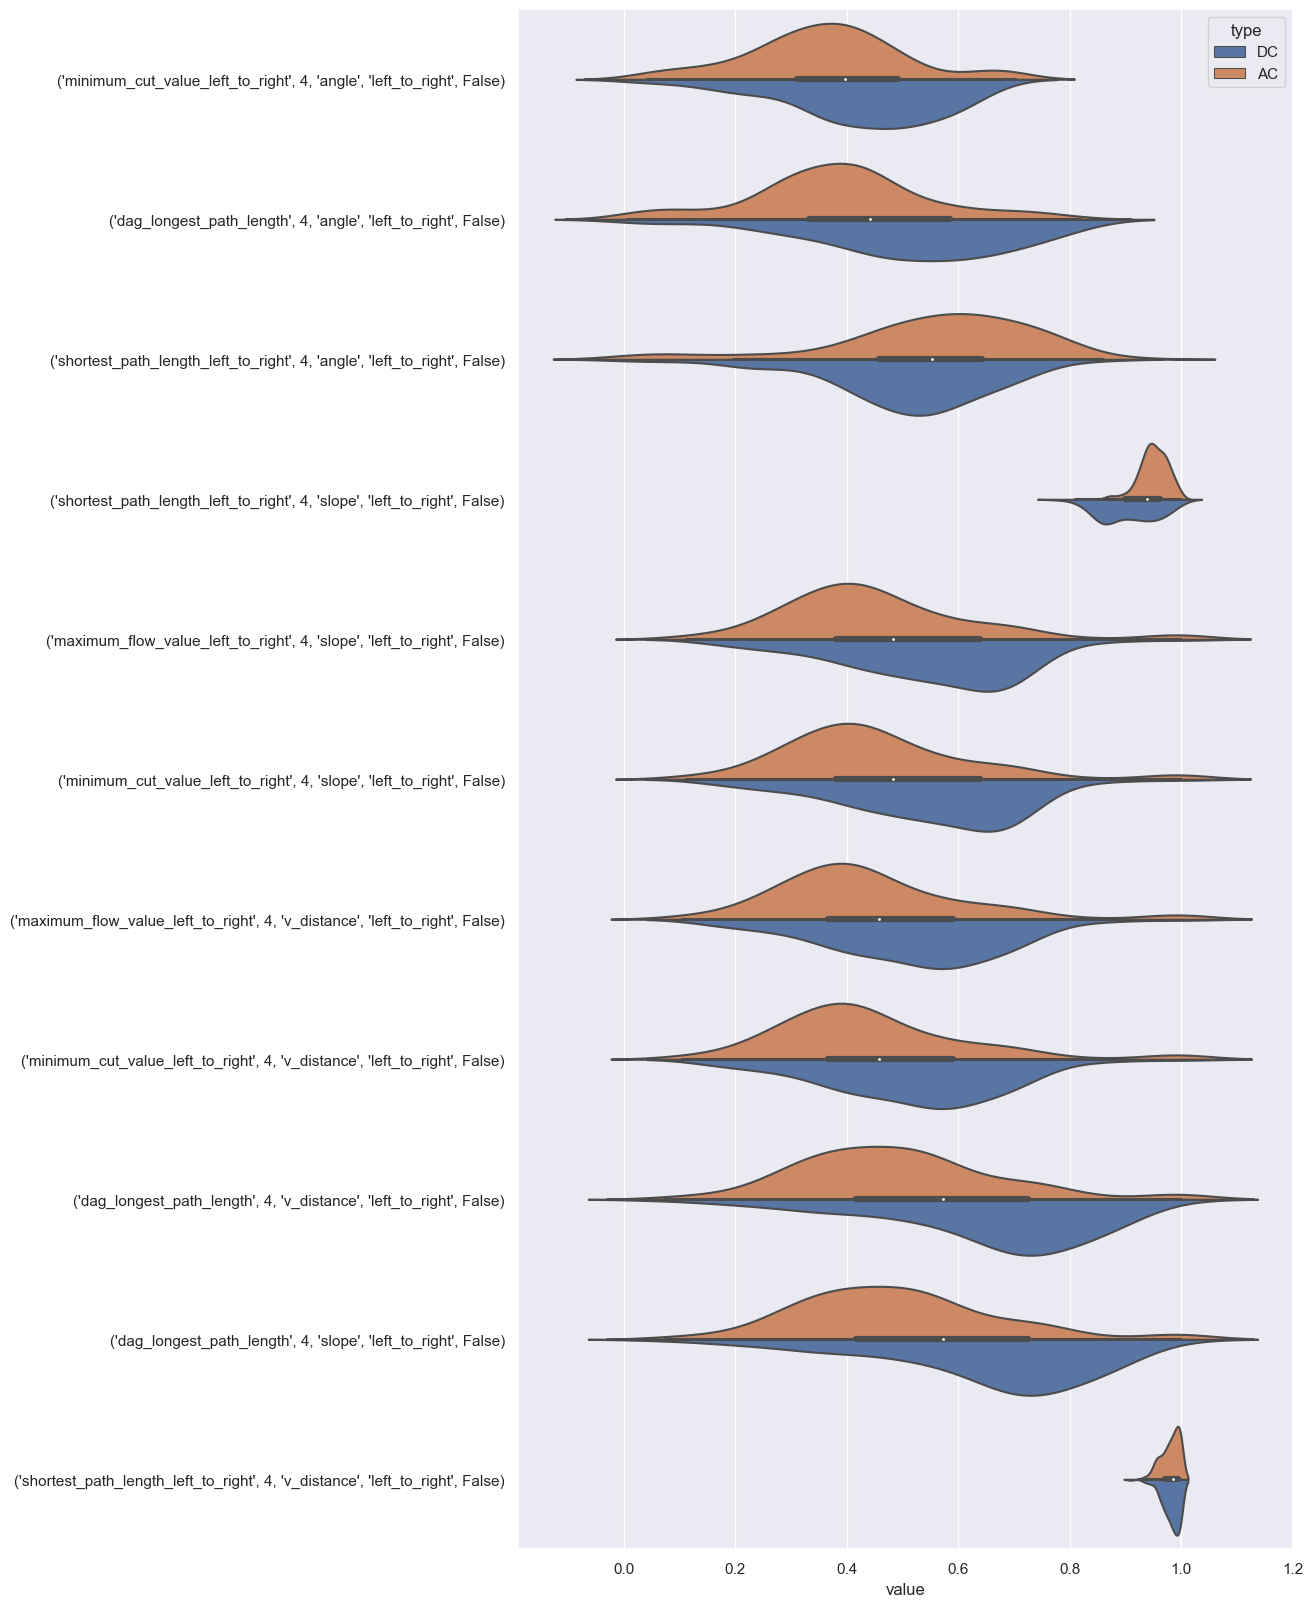

In [12]:
sns.set(rc={'figure.figsize':(10,20)})
g = sns.violinplot(data=df0, y=df0.index, x="value", hue="type", split=True)
g.set(ylim=(-.5, 10.5))